In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(rc = {"figure.figsize":(16, 9)})

Попробуем решить с помощью написанного в прошлом семестре солвера систему:
$$
u_t = u_{xx} + b u
$$
$$
u(t, 0) = u(t, 1) = 0
$$
$$
u(t = 0, x) = \sin \pi x
$$
Каждый пионер знает её решение:
$$
u(t, x) = \exp \{- t (\pi ^2 - b)\} \sin \pi x
$$
Но что если взять $b=10$. Тогда решение станет неустойчивым, как видно из формулы. Убедимся в этом.

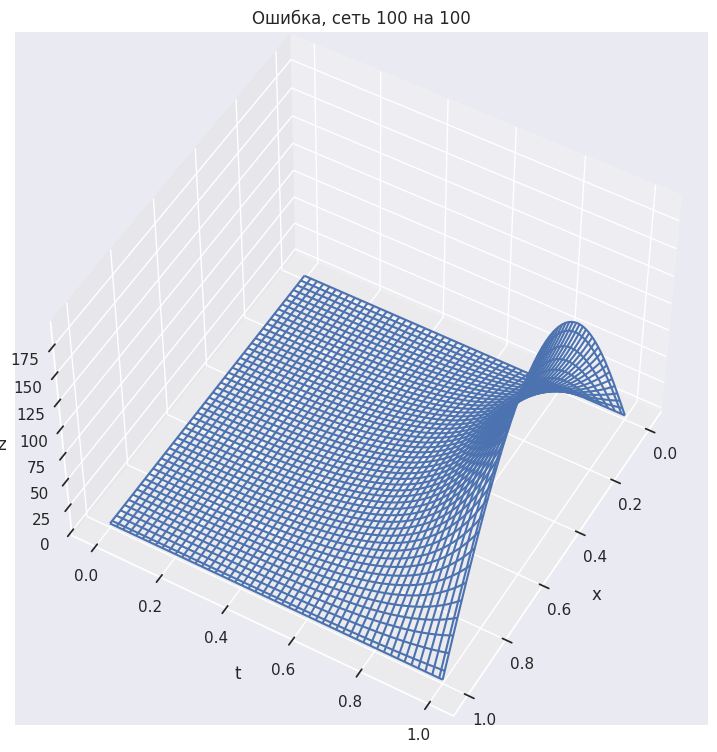

Максимальная относительная погрешность 169.47466783485095


In [54]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем данные для построения поверхности
x = np.linspace(0, 1, 100)
t = np.linspace(0, 1, 100)
x, t = np.meshgrid(x, t)
z  = np.loadtxt( "../build/bb_h100t100.txt")
x1 = np.linspace(0, 1, 100)
t1 = np.linspace(0, 1, 100)
x1, t1 = np.meshgrid(x1, t1)
z1 = np.sin(np.pi * x) * np.exp(-(np.pi * np.pi - 10) * t)

# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, t, z - z1, cmap='viridis')

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')
ax.set_title("Ошибка, сеть 100 на 100")
ax.view_init(50, 30)
# Отображаем график
plt.show()

print("Максимальная относительная погрешность", np.max((z - z1)[z1 > 0] / z1[z1>0]))

Видим, что погрешность очень велика. Теперь попробуем повторить алгоритм ии семинара.

$$
w _t = w _{xx} + b w
$$
$$
w(t, 0) = 0, \quad w(t, 2) = 0
$$
$$
w(0, x) = \sin \pi x \text{ (при $x \leq 1$)}
$$
$$
w(0, x) = ? \text{ (при $1 < x \leq 2$)}
$$
Выбираем ? так, чтобы загасить плохие коэффициенты в решении (которые устремляются к бесконечности).
? ищем в виде:

? = $c_1 l_1 + c_2 l_2$

$$
l_1(0, x) = 0 \text{ (при $x \leq 1$)}
$$
$$
l_1(0, x) = \sin \frac{\pi x}{2}  \text{ (при $1 < x \leq 2$)}
$$
$$
l_2(0, x) = 0 \text{ (при $x \leq 1$)}
$$
$$
l_2(0, x) = \sin \pi x  \text{ (при $1 < x \leq 2$)}
$$
$$
c_1, \ c_2: (w(x), \sin \frac{\pi x}{2}) = 0 \quad (w(x), \sin \pi x) = 0 
$$
Попробуем вычислить добавку, "убивающую" возрастающие члены.
$$
c_1, \ c_2: (w(x), \sin \frac{\pi x}{2}) = 0 \quad (w(x), \sin \pi x) = 0 
$$
Это превращается в систему:
$$
\begin{cases}
  \int _0^1 \sin \pi x \sin \frac{\pi x}{2} dx + c_1 \int _1^2 \sin \frac{\pi x}{2} \sin \frac{\pi x}{2} dx + c_2 \int _1^2 \sin \pi x \sin \frac{\pi x}{2} dx = 0,   \\
  \int _0^1 \sin \pi x \sin \pi x dx + c_1 \int _1^2 \sin \frac{\pi x}{2} \sin \pi x dx + c_2 \int _1^2 \sin \pi x \sin \pi x dx = 0.
\end{cases}
$$
$$
\int _0^1 \sin \pi x \sin \pi x dx = \frac{1}{2}
$$
$$
\int _0^1 \sin \pi x \sin \frac{\pi x}{2} dx = \frac{4}{3\pi}
$$
$$
\int _1^2 \sin \frac{\pi x}{2} \sin \frac{\pi x}{2} dx = \frac{1}{2}
$$
$$
\int _1^2 \sin \pi x \sin \frac{\pi x}{2} dx = -\frac{4}{3\pi}
$$
$$
\int _1^2 \sin \pi x \sin \pi x dx = \frac{1}{2}
$$

Подставив интегралы в систему, получим:
$$
\begin{cases}
    \frac{4}{3\pi} + c_1 \cdot \frac{1}{2} - c_2 \cdot \frac{4}{3\pi} = 0, \\
    \frac{1}{2} - c_1 \cdot \frac{4}{3\pi} + c_2 \cdot \frac{1}{2} = 0.
\end{cases}
$$

Итого, имеем:
$$
c_1 = - \frac{48 \pi}{9 \pi^2 - 64}, \quad c_2 = - \frac{9 \pi^2 + 64}{9 \pi^2 - 64}
$$

Если подставить соответствующее краевое условие в измененную систему (на отрезке [0, 2]) мы ожидаем меньшую погрешность.

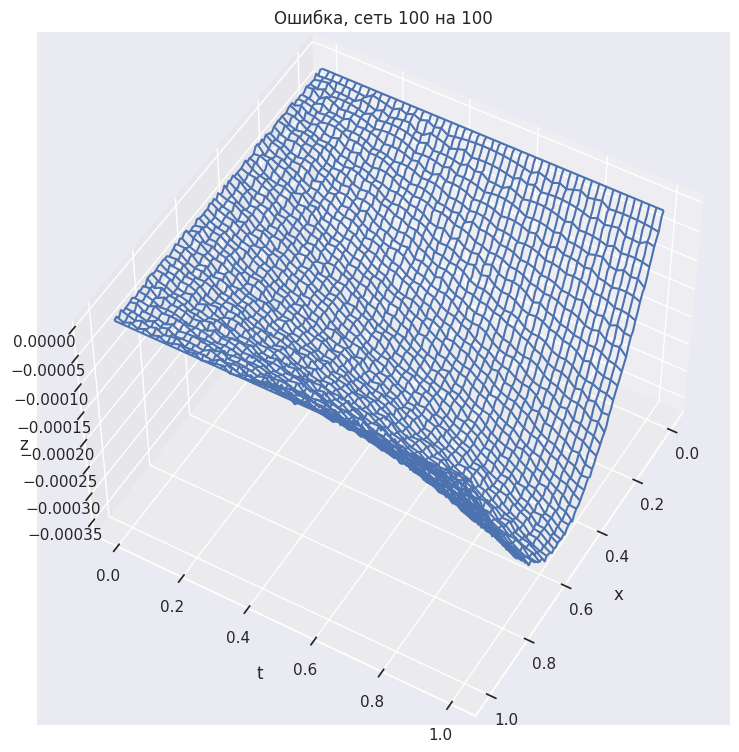

Максимальная относительная погрешность 9.240578618610007e-05


In [55]:
from mpl_toolkits.mplot3d import Axes3D

# Создаем данные для построения поверхности
x = np.linspace(0, 1, 100)
t = np.linspace(0, 1, 50)
x, t = np.meshgrid(x, t)
z  = np.loadtxt( "../build/bbr_h100t100.txt")[:50]
x1 = np.linspace(0, 1, 100)
t1 = np.linspace(0, 1, 50)
x1, t1 = np.meshgrid(x1, t1)
z1 = np.sin(np.pi * x) * np.exp(-(np.pi * np.pi - 10) * t)

# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, t, z - z1, cmap='viridis')

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('z')
ax.set_title("Ошибка, сеть 100 на 100")
ax.view_init(50, 30)
# Отображаем график
plt.show()
print("Максимальная относительная погрешность", np.max((z - z1)[z1 > 0] / z1[z1>0]))

Теперь ситуация внезапно стала гораздо оптимистичнее!